# WiDS Datathon 2021, Wrangling the Data
## 1. Initial Look at the DF
Summarizing the raw df:
- what is the shape of the data?
- what is the target variable? and its distribution?
- how many nulls?
- identify outliers/anomalies
- and more...

## 2. Prepping the Data for Exploration and Modeling
Taking care of questions addressed above:
- impute or remove nulls
- handle outliers
- split into train/validate/test

## 3. Add Code into Functions in a .py File

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading csv file into a pandas dataframe
df = pd.read_csv('data/TrainingWiDS2021.csv', index_col=0)

# 1. Initial Look at the Raw DF

In [3]:
# checking the shape of the data
print('There are', df.shape[1], 'columns and', df.shape[0], 'observations in the df.')

There are 180 columns and 130157 observations in the df.


In [4]:
print('Columns in the df are:')
df.columns.to_list()

Columns in the df are:


['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp

### There are a large amount of columns in the data. Will these all be useful? Can some be removed due to poor data quality (high nulls)?

In [5]:
# creating dataframe of null count for each column
null_counts = pd.DataFrame(df.isnull().sum())

# renaming count column
null_counts.columns = ['nulls']

In [6]:
# creating column in null counts for the percentage of the column that is nulls
null_counts['percent'] = round((null_counts.nulls / df.shape[0]) * 100,2)

In [7]:
# checking how many column have a null percentage greater than 50
null_counts[null_counts.percent > 50]

,nulls,percent
albumin_apache,78163,60.05
bilirubin_apache,82560,63.43
fio2_apache,99720,76.62
paco2_apache,99720,76.62
paco2_for_ph_apache,99720,76.62
...,...,...
h1_arterial_ph_min,107849,82.86
h1_arterial_po2_max,107445,82.55
h1_arterial_po2_min,107445,82.55
h1_pao2fio2ratio_max,113397,87.12


In [23]:
# to check specific columns during data dictionary
# null_counts[16:44]

### Data Quality
- 20 columns have no null values
- 79 columns have greater than 20% nulls
- 73 columns have more than half nulls

## Visualizing Distribution of the Target Variable
- diabetes_mellitus, if the patient has been diagnosed with diabetes
- binary value
- 1 if diagnosed with diabetes, 0 if not

Text(0.5, 1.0, 'Distribution of Diabetic Patients')

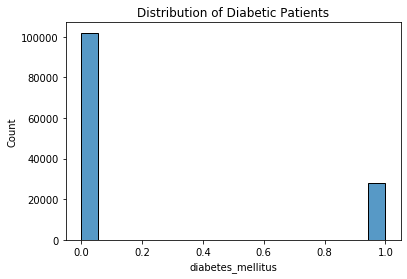

In [10]:
sns.histplot(df.diabetes_mellitus)
plt.title('Distribution of Diabetic Patients')

In [11]:
df.diabetes_mellitus.value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

## Most patients in the dataset are not diabetic

In [ ]:
# while creating the data dictionary
#for x in df.columns:
#    print(df[x].dtypes, x)

In [ ]:
# df.wbc_apache.max()

# 2. Prepping the Data for Exploration and Modeling
## First, converting features to the correct data type
- some columns are being stored as floats when the values all end in .0, i.e. 103.0
- the gender feature can be converted to a binary 0-1 value

## Age - Float to Integer

In [12]:
df.age.value_counts()

67.0    3229
68.0    3065
71.0    3060
72.0    2995
66.0    2977
        ... 
20.0     473
18.0     377
17.0     180
16.0      85
0.0       30
Name: age, Length: 75, dtype: int64

Note: 4,988 patients have a null value for age. Because there is a total of > 130,000 patients, will impute the null values with the average age 

Average Patient Age: 62.0
 Median Patient Age: 64.0


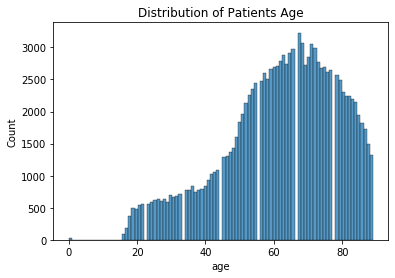

In [13]:
sns.histplot(df.age)
plt.title('Distribution of Patients Age')

print('Average Patient Age:', round(df.age.mean(),0))
print(' Median Patient Age:', round(df.age.median(),0))

In [14]:
# setting avariable as rounded average age
avg_age = round(df.age.mean(),0)

# filling null values with the average age
df.age = df.age.fillna(avg_age)

In [15]:
# age is in years, and all values end in 0 - will be converted to integers
df.age = df.astype({'age':'int'})

## Gender - String to Boolean

In [16]:
# 66 patients have null values for gender
# with such an insiginficant amount, will leave them for now
df.gender.isnull().sum()

66

In [17]:
df['is_female'] = df.gender.replace({'M':0, 'F':1})

In [22]:
df.isnull().sum()

encounter_id                      0
hospital_id                       0
age                               0
bmi                            4490
elective_surgery                  0
                               ... 
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
diabetes_mellitus                 0
is_female                        66
Length: 181, dtype: int64

### Apache 2 Diagnosis - Removing .0 from Integers

In [45]:
df.apache_2_diagnosis.value_counts()

113.0    16402
301.0     9858
302.0     8904
112.0     5981
308.0     5855
124.0     5548
117.0     5290
122.0     5206
303.0     5072
304.0     4594
110.0     4395
203.0     3860
106.0     3537
121.0     3431
202.0     3408
114.0     3298
305.0     3111
123.0     2918
119.0     2712
102.0     2631
307.0     2629
118.0     2338
120.0     1994
108.0     1668
214.0     1656
109.0     1440
105.0     1369
218.0     1086
213.0     1041
207.0      973
306.0      830
217.0      802
219.0      714
209.0      645
101.0      605
104.0      580
103.0      487
115.0      392
107.0      300
116.0      279
215.0      215
208.0      214
212.0      138
216.0       66
Name: apache_2_diagnosis, dtype: int64

In [47]:
# rows that have a null value for spache 2 diagnosis
df.apache_2_diagnosis.isnull().sum()

1685

In [51]:
# can not convert data types with null values in the column, will fill nulls with the average value
# setting variable as the average value
apache_2_diagnosis_mean = df.apache_2_diagnosis.mean()

# filling the 1,685 null values with the average
df.apache_2_diagnosis = df.apache_2_diagnosis.fillna(apache_2_diagnosis_mean)

# now, can convert the data types to integers without trailing decimals
df.apache_2_diagnosis = df.apache_2_diagnosis.astype('int')

In [52]:
# can see no more decimal values
df.apache_2_diagnosis

1         113
2         108
3         122
4         203
5         119
         ... 
130153    110
130154    105
130155    114
130156    124
130157    105
Name: apache_2_diagnosis, Length: 130157, dtype: int64

## Creating Dummy Variables
### ICU Stay Type
- this feature has three different categories
    - admit - replace with 1
    - transfer - replace with 2
    - readmit - replace with 3

In [32]:
# the three categories in icu stay type
df.icu_stay_type.value_counts()

admit       124741
transfer      4801
readmit        615
Name: icu_stay_type, dtype: int64

In [37]:
df.icu_stay_type = df.icu_stay_type.replace({'admit':1, 'transfer':2, 'readmit':3})

In [38]:
# the three categories after replacing with 1,2,3
df.icu_stay_type.value_counts()

1    124741
2      4801
3       615
Name: icu_stay_type, dtype: int64

## What should be removed?
- I will set a threshold of nulls percentage, and remove any columns or rows more than this threshold
- starting at 50% nulls, will determine later if a lower or higher threshold is needed

In [18]:
# Removing Nulls from Columns
# sets thresh hold to 75 percent nulls, if more than %25 nulls it will be removed
threshold = df.shape[0] * .50

# remove columns with specified threshold
df_prepped = df.dropna(axis=1, thresh=threshold)
    
# Removing Nulls from Rows
# sets thresh hold to 75 percent nulls, if more than %25 nulls it will be removed
thresh_hold = df.shape[1] * .50

# remove rows with specified threshold
df_prepped = df.dropna(axis=0,thresh=thresh_hold)

In [19]:
print('   The df now has', df_prepped.shape[1], 'rows with', df_prepped.shape[0], 'observations. \nIt originally had 180 columns and 130157 observations before removing nulls above 50% in the columns and rows.')

   The df now has 181 rows with 119850 observations. 
It originally had 180 columns and 130157 observations before removing nulls above 50% in the columns and rows.
